In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# I. Text Preprocessing and Exploratory Data Analysis

In [ ]:
import pandas as pd

label_data = pd.read_csv("gdrive/Shared drives/FIT5149 A2/labeled_data.csv")
label_data.head()

,text,label
0,The new rule is - \r\nif you are waiting for a...,4
1,"Flirted with giving this two stars, but that's...",3
2,I was staying at planet Hollywood across the s...,5
3,Food is good but prices are super expensive. ...,2
4,Worse company to deal with they do horrible wo...,1


In [ ]:
# install required packages
! pip install contractions
! pip install textsearch

     |████████████████████████████████| 245kB 4.1MB/s 
     |████████████████████████████████| 317kB 44.4MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81704 sha256=93e4929479e1c13899e339492a377fe6e4a7f689d0b5a148854105c6ac2e7d6b
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [ ]:
# imoport library
import re, string, unicodedata
import nltk
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
import numpy as np

## 1. Replace contractions

In [ ]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

replace_contraction = []

for idx,row in label_data.iterrows():
  replace_contraction.append(replace_contractions(row['text']))
  
label_data['new_text'] = replace_contraction
label_data.head()

,text,label,new_text
0,The new rule is - \r\nif you are waiting for a...,4,The new rule is - \r\nif you are waiting for a...
1,"Flirted with giving this two stars, but that's...",3,"Flirted with giving this two stars, but that i..."
2,I was staying at planet Hollywood across the s...,5,I was staying at planet Hollywood across the s...
3,Food is good but prices are super expensive. ...,2,Food is good but prices are super expensive. ...
4,Worse company to deal with they do horrible wo...,1,Worse company to deal with they do horrible wo...


## 2. Lower casing

In [ ]:
label_data['new_text'] = label_data['new_text'].str.lower()
label_data.head()

,text,label,new_text
0,The new rule is - \r\nif you are waiting for a...,4,the new rule is - \r\nif you are waiting for a...
1,"Flirted with giving this two stars, but that's...",3,"flirted with giving this two stars, but that i..."
2,I was staying at planet Hollywood across the s...,5,i was staying at planet hollywood across the s...
3,Food is good but prices are super expensive. ...,2,food is good but prices are super expensive. ...
4,Worse company to deal with they do horrible wo...,1,worse company to deal with they do horrible wo...


## 3. Tokenization

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# tokenization
token = []

for idx, row in label_data.iterrows():
  token.append(nltk.word_tokenize(row['new_text']))
  
# remove non alpha numeric tokens
for i in range(len(token)):
  token[i] = [t for t in token[i] if t.isalnum()]

label_data['token'] = token

In [ ]:
label_data.head()

,text,label,new_text,token
0,The new rule is - \r\nif you are waiting for a...,4,the new rule is - \r\nif you are waiting for a...,"[the, new, rule, is, if, you, are, waiting, fo..."
1,"Flirted with giving this two stars, but that's...",3,"flirted with giving this two stars, but that i...","[flirted, with, giving, this, two, stars, but,..."
2,I was staying at planet Hollywood across the s...,5,i was staying at planet hollywood across the s...,"[i, was, staying, at, planet, hollywood, acros..."
3,Food is good but prices are super expensive. ...,2,food is good but prices are super expensive. ...,"[food, is, good, but, prices, are, super, expe..."
4,Worse company to deal with they do horrible wo...,1,worse company to deal with they do horrible wo...,"[worse, company, to, deal, with, they, do, hor..."


## 4. Exploratory data analysis
### Class distribution

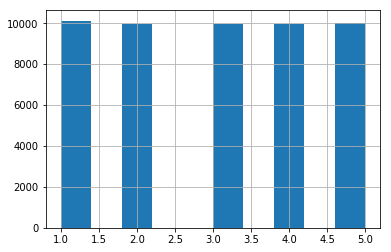

In [ ]:
# distribution of label
label_data['label'].hist()

There are 50,000 documents and the classes are balanced.

### Number of tokens for each class

In [ ]:
len_list = []

for idx, row in label_data.iterrows():
  len_list.append(len(row['token']))

label_data['token_length'] = len_list

In [ ]:
label_data.head()

,text,label,new_text,token,token_length
0,The new rule is - \r\nif you are waiting for a...,4,the new rule is - \r\nif you are waiting for a...,"[the, new, rule, is, if, you, are, waiting, fo...",108
1,"Flirted with giving this two stars, but that's...",3,"flirted with giving this two stars, but that i...","[flirted, with, giving, this, two, stars, but,...",205
2,I was staying at planet Hollywood across the s...,5,i was staying at planet hollywood across the s...,"[i, was, staying, at, planet, hollywood, acros...",110
3,Food is good but prices are super expensive. ...,2,food is good but prices are super expensive. ...,"[food, is, good, but, prices, are, super, expe...",138
4,Worse company to deal with they do horrible wo...,1,worse company to deal with they do horrible wo...,"[worse, company, to, deal, with, they, do, hor...",129


In [ ]:
# entry with most tokens
label_data[label_data['token_length'] == max(label_data['token_length'])].values

array([['I\'m 16 weeks along and I\'ve been seen at this location : 8285 W Arby Ave, Ste 280, Las Vegas, NV 89113 since the beginning of my OB treatment for my 2nd pregnancy. For those who are or were military it runs the same. You see a different Doctor each visit which I\'m not a fan of because every visit it seems like I have to repeat my self and I always get the "oh I didn\'t see it in your chart". I was told I had to do a Pap smear when I told the Dr I already did one during my 2nd visit. I also wanted to know the results of the Down syndrome test but the Dr or any of the staff failed to inform me it was a 2 part test. Meaning I did the 1st blood draw but I wasn\'t told I had to do a 2nd. \r\n\r\nIt was the Dr who I saw today when I asked her about the results said "oh, no one told you it\'s a two part test?" She said you can have that done today. It\'s fine I was there for my appointment today anyways so I went to the lady who you set appointments with because that\'s who the dr

In [ ]:
# entry with little tokens
for idx, row in label_data.iterrows():
  if row['token_length'] <3:
    print(idx, row['text'], row['label'])


1491 ...... 1
4323 ï¼ãæåãã¾ããï¼å¤§å¥½ãã§ãã
ï¼ãç¾å³ããï¼æ²¢å±±ã®äººã«ç´¹ä»ãããï¼
ï¼ãã¢ãã¬ã¼ã¸ï¼
ï¼ãç§ã®å¥½ã¿ã§ã¯ããã¾ããã§ãããã§ãã¾ããã¤ããã£ã¬ã³ã¸ãã¦ãããããªããã
ï¼ãããäºåº¦ã¨ä¼ºããã¨ã¯ããã¾ããã

ãã¼ã«ã®ç¨®é¡ãè±å¯ï¼
ä½ãããããªã®ãããã¼ã«ã°ã©ã¹ããã¤ãç¶ºéºã«æ´æµããã¦ãããã¨ï¼

ãã­ã³ãã§ã¯ãããã§ãã¼ã«ãé£²ãã®ã1çªå¥½ãããã 3
12644 éè »å¥½åçï¼åªæ¯é¸è¾£æ¹¯åºæå¯ä»¥å¤ä¸é»ãå°é¾æ¹¯åå¾åçªé¦éï¼å¾æåµæãå°é¾æ¹¯åçªé¦éçåºç¤éæï¼1çååå°å°çè¿èçè¶ï¼é¸è¾£æ¹¯é¸é¸è¾£è¾£çä¹æä¸é»é»çå¾å¥½åãåçåä¹å¾å¥½åï¼å¤ªæ£äºï¼ 4
16884 #NAME? 1
19821 #NAME? 2
26397 ä¹ãã¶ãã«å£ã«åããªãï¼
ã¹ã¢ã¼ã«ãã¼ã·ã§ã³ã®ã³ã¼ã¹ããªã¼ãã¼ãã¾ããã
åãï¼
ã¡ãã¥ã¼ã®ã»ã¨ãã©ã®ç¨®é¡ã®æçãå

We might consider removing all of these entries except 40698, 41578, and 47864 since they have no meaning.

In [ ]:
label_data.groupby('label').mean()

,token_length
label,
1,142.838075
2,142.229363
3,130.506937
4,113.989956
5,87.035536


In [ ]:
label_data['token_length'].mean()

123.3391

One interesting thing to mentioned is the higher the rating, the less the number of tokens.

The average number of tokens in a review is 123.35 for the labelled data.

### Size of vocabulary

In [ ]:
vocab_all = set()

for idx, row in label_data.iterrows():
  for word in row['token']:
    vocab_all.add(word)

In [ ]:
len(vocab_all)

55268

The size of vocab is just 55268 which is quite small compare to the number of documents.

### Standard deviation of token size of product review

In [ ]:
label_data.describe()

,label,token_length
count,50000.000000,50000.000000
mean,2.995800,123.339100
std,1.417569,112.942713
min,1.000000,0.000000
25%,2.000000,49.000000
50%,3.000000,89.000000
75%,4.000000,159.000000
max,5.000000,1040.000000


### Common unigram and bigram

In [ ]:
from collections import Counter

# bigram
counts_bi = Counter()

for text in label_data['text']:
  words = nltk.word_tokenize(text)
  counts_bi.update(nltk.bigrams(words))

In [ ]:
counts_bi.most_common(20)

[(('.', 'I'), 54926),
 (('.', 'The'), 42708),
 ((',', 'and'), 22253),
 ((',', 'but'), 20378),
 (('of', 'the'), 18949),
 (('in', 'the'), 15873),
 (('it', 'was'), 15802),
 ((',', 'I'), 15761),
 (('and', 'the'), 15286),
 (('I', 'was'), 15167),
 (('!', '!'), 14878),
 (('.', 'It'), 14783),
 (('.', 'We'), 14032),
 (('on', 'the'), 12510),
 (('and', 'I'), 11893),
 (('.', 'They'), 11294),
 (('to', 'the'), 11129),
 ((',', 'the'), 10796),
 (('for', 'the'), 10514),
 (('for', 'a'), 10330)]

In [ ]:
# unigram
counts_uni = Counter()

for text in label_data['text']:
  words = nltk.word_tokenize(text)
  counts_uni.update(words)

In [ ]:
counts_uni.most_common(20)

[('.', 368938),
 ('the', 253694),
 (',', 204980),
 ('and', 194792),
 ('I', 185203),
 ('to', 153613),
 ('a', 148885),
 ('was', 119392),
 ('of', 86345),
 ('it', 77173),
 ('for', 71310),
 ('is', 68796),
 ('in', 64581),
 ('!', 59717),
 ('that', 55835),
 ('The', 52194),
 ('my', 48026),
 ('with', 47211),
 ("n't", 45843),
 ('but', 44677)]

all of them are stop words, therefore we will remove the stop words and run the above process again

## 5.Remove stop words

In [ ]:
label_data.head()

,text,label,new_text,token,token_length
0,The new rule is - \r\nif you are waiting for a...,4,the new rule is - \r\nif you are waiting for a...,"[the, new, rule, is, if, you, are, waiting, fo...",108
1,"Flirted with giving this two stars, but that's...",3,"flirted with giving this two stars, but that i...","[flirted, with, giving, this, two, stars, but,...",205
2,I was staying at planet Hollywood across the s...,5,i was staying at planet hollywood across the s...,"[i, was, staying, at, planet, hollywood, acros...",110
3,Food is good but prices are super expensive. ...,2,food is good but prices are super expensive. ...,"[food, is, good, but, prices, are, super, expe...",138
4,Worse company to deal with they do horrible wo...,1,worse company to deal with they do horrible wo...,"[worse, company, to, deal, with, they, do, hor...",129


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
STOPWORDS = stopwords.words('english')
# remove negation words from stopwords
STOPWORDS = [w for w in STOPWORDS if w not in ('no','not','nor')]

In [ ]:
token_wo_stop = []

# remove stopwords from review
for idx, row in label_data.iterrows():
  temp = [i for i in row['token'] if i not in STOPWORDS]
  token_wo_stop.append(temp)

label_data['token_wo_stop'] = token_wo_stop
label_data.head()


,text,label,new_text,token,token_length,token_wo_stop
0,The new rule is - \r\nif you are waiting for a...,4,the new rule is - \r\nif you are waiting for a...,"[the, new, rule, is, if, you, are, waiting, fo...",108,"[new, rule, waiting, table, almost, always, no..."
1,"Flirted with giving this two stars, but that's...",3,"flirted with giving this two stars, but that i...","[flirted, with, giving, this, two, stars, but,...",205,"[flirted, giving, two, stars, pretty, damning,..."
2,I was staying at planet Hollywood across the s...,5,i was staying at planet hollywood across the s...,"[i, was, staying, at, planet, hollywood, acros...",110,"[staying, planet, hollywood, across, street, s..."
3,Food is good but prices are super expensive. ...,2,food is good but prices are super expensive. ...,"[food, is, good, but, prices, are, super, expe...",138,"[food, good, prices, super, expensive, 8, buck..."
4,Worse company to deal with they do horrible wo...,1,worse company to deal with they do horrible wo...,"[worse, company, to, deal, with, they, do, hor...",129,"[worse, company, deal, horrible, work, bring, ..."


In [ ]:
# bigram
counts_bi = Counter()

for l in label_data['token_wo_stop']:
  counts_bi.update(nltk.bigrams(l))

In [ ]:
counts_bi.most_common(20)

[(('would', 'not'), 3483),
 (('could', 'not'), 3211),
 (('customer', 'service'), 3131),
 (('not', 'even'), 3108),
 (('go', 'back'), 2461),
 (('first', 'time'), 2237),
 (('not', 'know'), 2083),
 (('not', 'get'), 2018),
 (('come', 'back'), 1975),
 (('not', 'good'), 1753),
 (('not', 'sure'), 1637),
 (('pretty', 'good'), 1632),
 (('not', 'go'), 1554),
 (('really', 'good'), 1473),
 (('food', 'not'), 1468),
 (('not', 'bad'), 1468),
 (('not', 'want'), 1460),
 (('food', 'good'), 1420),
 (('ice', 'cream'), 1346),
 (('even', 'though'), 1332)]

In [ ]:
# trigram
counts_tri = Counter()

for l in label_data['token_wo_stop']:
  counts_tri.update(nltk.trigrams(l))

In [ ]:
counts_tri.most_common(20)

[(('would', 'not', 'recommend'), 500),
 (('not', 'go', 'back'), 391),
 (('would', 'go', 'back'), 341),
 (('not', 'going', 'back'), 304),
 (('would', 'not', 'go'), 282),
 (('would', 'come', 'back'), 271),
 (('could', 'not', 'even'), 261),
 (('could', 'not', 'get'), 242),
 (('would', 'highly', 'recommend'), 238),
 (('never', 'go', 'back'), 238),
 (('not', 'come', 'back'), 217),
 (('not', 'coming', 'back'), 215),
 (('great', 'customer', 'service'), 203),
 (('sweet', 'potato', 'fries'), 179),
 (('would', 'definitely', 'recommend'), 179),
 (('go', 'somewhere', 'else'), 179),
 (('not', 'waste', 'time'), 178),
 (('not', 'recommend', 'place'), 178),
 (('definitely', 'come', 'back'), 176),
 (('mac', 'n', 'cheese'), 175)]

In [ ]:
# unigram
counts_uni = Counter()

for l in label_data['token_wo_stop']:
  counts_uni.update(l)

counts_uni.most_common(20)

[('not', 92408),
 ('food', 28792),
 ('good', 26646),
 ('would', 24843),
 ('place', 24787),
 ('like', 20586),
 ('service', 19485),
 ('get', 19093),
 ('time', 18692),
 ('one', 18410),
 ('great', 17534),
 ('back', 16543),
 ('no', 15431),
 ('go', 14693),
 ('really', 13750),
 ('us', 12557),
 ('got', 11611),
 ('even', 11075),
 ('could', 10900),
 ('also', 10877)]

The frequency for the most common bigram and trigram token is quite low, which means the features are unlikely to generalized well. Using unigram tokens is more appropriate in this case.

**Recalculate token count**

In [ ]:
token_len_wo_stop=[]

for idx, row in label_data.iterrows():
  temp = len(row['token_wo_stop'])
  token_len_wo_stop.append(temp)

In [ ]:
label_data['token_len_wo_stop'] = token_len_wo_stop
label_data.head()

,text,label,new_text,token,token_length,token_wo_stop,token_len_wo_stop
0,The new rule is - \r\nif you are waiting for a...,4,the new rule is - \r\nif you are waiting for a...,"[the, new, rule, is, if, you, are, waiting, fo...",108,"[new, rule, waiting, table, almost, always, no...",50
1,"Flirted with giving this two stars, but that's...",3,"flirted with giving this two stars, but that i...","[flirted, with, giving, this, two, stars, but,...",205,"[flirted, giving, two, stars, pretty, damning,...",103
2,I was staying at planet Hollywood across the s...,5,i was staying at planet hollywood across the s...,"[i, was, staying, at, planet, hollywood, acros...",110,"[staying, planet, hollywood, across, street, s...",56
3,Food is good but prices are super expensive. ...,2,food is good but prices are super expensive. ...,"[food, is, good, but, prices, are, super, expe...",138,"[food, good, prices, super, expensive, 8, buck...",71
4,Worse company to deal with they do horrible wo...,1,worse company to deal with they do horrible wo...,"[worse, company, to, deal, with, they, do, hor...",129,"[worse, company, deal, horrible, work, bring, ...",61


## 6. Stemming

In [ ]:
stemmer = LancasterStemmer()

stem = []

for idx, row in label_data.iterrows():
  temp = [stemmer.stem(w) for w in row['token_wo_stop']]
  stem.append(temp)

label_data['stem'] = stem

In [ ]:
label_data.head()

,text,label,new_text,token,token_length,token_wo_stop,token_len_wo_stop,stem
0,The new rule is - \r\nif you are waiting for a...,4,the new rule is - \r\nif you are waiting for a...,"[the, new, rule, is, if, you, are, waiting, fo...",108,"[new, rule, waiting, table, almost, always, no...",50,"[new, rul, wait, tabl, almost, alway, not, wai..."
1,"Flirted with giving this two stars, but that's...",3,"flirted with giving this two stars, but that i...","[flirted, with, giving, this, two, stars, but,...",205,"[flirted, giving, two, stars, pretty, damning,...",103,"[flirt, giv, two, star, pretty, damn, rat, mig..."
2,I was staying at planet Hollywood across the s...,5,i was staying at planet hollywood across the s...,"[i, was, staying, at, planet, hollywood, acros...",110,"[staying, planet, hollywood, across, street, s...",56,"[stay, planet, hollywood, across, street, saw,..."
3,Food is good but prices are super expensive. ...,2,food is good but prices are super expensive. ...,"[food, is, good, but, prices, are, super, expe...",138,"[food, good, prices, super, expensive, 8, buck...",71,"[food, good, pric, sup, expend, 8, buck, extr,..."
4,Worse company to deal with they do horrible wo...,1,worse company to deal with they do horrible wo...,"[worse, company, to, deal, with, they, do, hor...",129,"[worse, company, deal, horrible, work, bring, ...",61,"[wors, company, deal, horr, work, bring, truck..."


## 7. Remove least frequent word

In [ ]:
cnt = Counter()

for l in label_data["stem"].values:
    for word in set(l):
        cnt[word] += 1

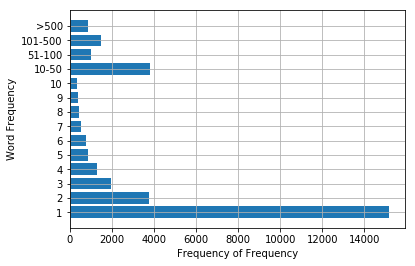

In [ ]:
# plot frequency of frequency
from pylab import *

y = [0]*14
for k, v in cnt.items():
     if v <= 10:
        y[v-1] += 1
     elif v >10 and v <= 50:
        y[10] += 1
     elif v >50 and v <= 100:
        y[11] += 1
     elif v > 100 and v <= 500:
        y[12] += 1
     else:
        y[13] += 1
x = range(1, 15) # generate integer from 1 to 14
ytks =list(map(str, range(1, 11))) # covert a integer list to a string list
ytks.append('10-50')
ytks.append('51-100')
ytks.append('101-500')
ytks.append('>500')
barh(x,y, align='center')
yticks(x, ytks)
xlabel('Frequency of Frequency')
ylabel('Word Frequency')
grid(True)

In [ ]:
# find rare words
RAREWORDS = [w for (w, wc) in cnt.most_common() if wc < 2]

## remove rare toke
rare=[]

for idx, row in label_data.iterrows():
  temp = [i for i in row['stem'] if i not in RAREWORDS]
  rare.append(temp)

label_data['no_rare'] = rare

In [ ]:
label_data.head()

,text,label,new_text,token,token_length,token_wo_stop,token_len_wo_stop,stem,no_rare
0,The new rule is - \r\nif you are waiting for a...,4,the new rule is - \r\nif you are waiting for a...,"[the, new, rule, is, if, you, are, waiting, fo...",108,"[new, rule, waiting, table, almost, always, no...",50,"[new, rul, wait, tabl, almost, alway, not, wai...","[new, rul, wait, tabl, almost, alway, not, wai..."
1,"Flirted with giving this two stars, but that's...",3,"flirted with giving this two stars, but that i...","[flirted, with, giving, this, two, stars, but,...",205,"[flirted, giving, two, stars, pretty, damning,...",103,"[flirt, giv, two, star, pretty, damn, rat, mig...","[flirt, giv, two, star, pretty, damn, rat, mig..."
2,I was staying at planet Hollywood across the s...,5,i was staying at planet hollywood across the s...,"[i, was, staying, at, planet, hollywood, acros...",110,"[staying, planet, hollywood, across, street, s...",56,"[stay, planet, hollywood, across, street, saw,...","[stay, planet, hollywood, across, street, saw,..."
3,Food is good but prices are super expensive. ...,2,food is good but prices are super expensive. ...,"[food, is, good, but, prices, are, super, expe...",138,"[food, good, prices, super, expensive, 8, buck...",71,"[food, good, pric, sup, expend, 8, buck, extr,...","[food, good, pric, sup, expend, 8, buck, extr,..."
4,Worse company to deal with they do horrible wo...,1,worse company to deal with they do horrible wo...,"[worse, company, to, deal, with, they, do, hor...",129,"[worse, company, deal, horrible, work, bring, ...",61,"[wors, company, deal, horr, work, bring, truck...","[wors, company, deal, horr, work, bring, truck..."


In [ ]:
# recalculate token size
no_rare_len =[]

for idx, row in label_data.iterrows():
  temp = len(row['no_rare'])
  no_rare_len.append(temp)

label_data['no_rare_len'] = no_rare_len

label_data.head()

,text,label,new_text,token,token_length,token_wo_stop,token_len_wo_stop,stem,no_rare,no_rare_len
0,The new rule is - \r\nif you are waiting for a...,4,the new rule is - \r\nif you are waiting for a...,"[the, new, rule, is, if, you, are, waiting, fo...",108,"[new, rule, waiting, table, almost, always, no...",50,"[new, rul, wait, tabl, almost, alway, not, wai...","[new, rul, wait, tabl, almost, alway, not, wai...",50
1,"Flirted with giving this two stars, but that's...",3,"flirted with giving this two stars, but that i...","[flirted, with, giving, this, two, stars, but,...",205,"[flirted, giving, two, stars, pretty, damning,...",103,"[flirt, giv, two, star, pretty, damn, rat, mig...","[flirt, giv, two, star, pretty, damn, rat, mig...",102
2,I was staying at planet Hollywood across the s...,5,i was staying at planet hollywood across the s...,"[i, was, staying, at, planet, hollywood, acros...",110,"[staying, planet, hollywood, across, street, s...",56,"[stay, planet, hollywood, across, street, saw,...","[stay, planet, hollywood, across, street, saw,...",56
3,Food is good but prices are super expensive. ...,2,food is good but prices are super expensive. ...,"[food, is, good, but, prices, are, super, expe...",138,"[food, good, prices, super, expensive, 8, buck...",71,"[food, good, pric, sup, expend, 8, buck, extr,...","[food, good, pric, sup, expend, 8, buck, extr,...",71
4,Worse company to deal with they do horrible wo...,1,worse company to deal with they do horrible wo...,"[worse, company, to, deal, with, they, do, hor...",129,"[worse, company, deal, horrible, work, bring, ...",61,"[wors, company, deal, horr, work, bring, truck...","[wors, company, deal, horr, work, bring, truck...",61


## 8.Remove rows with wierd characters

In [ ]:
# Remove rows with wierd characters
df_dropped = label_data.drop([1491,4323,12644,16884,19821,26397,28964,29785,33834,35716,35906])


## 9. Re-join the tokens

In [ ]:
string = []

for idx, row in df_dropped.iterrows():
  temp = ' '.join(row['no_rare'])
  string.append(temp)

df_dropped['string'] = string

In [ ]:
df_dropped.head()

,text,label,new_text,token,token_length,token_wo_stop,token_len_wo_stop,stem,no_rare,no_rare_len,string
0,The new rule is - \r\nif you are waiting for a...,4,the new rule is - \r\nif you are waiting for a...,"[the, new, rule, is, if, you, are, waiting, fo...",108,"[new, rule, waiting, table, almost, always, no...",50,"[new, rul, wait, tabl, almost, alway, not, wai...","[new, rul, wait, tabl, almost, alway, not, wai...",50,new rul wait tabl almost alway not wait insid ...
1,"Flirted with giving this two stars, but that's...",3,"flirted with giving this two stars, but that i...","[flirted, with, giving, this, two, stars, but,...",205,"[flirted, giving, two, stars, pretty, damning,...",103,"[flirt, giv, two, star, pretty, damn, rat, mig...","[flirt, giv, two, star, pretty, damn, rat, mig...",102,flirt giv two star pretty damn rat might night...
2,I was staying at planet Hollywood across the s...,5,i was staying at planet hollywood across the s...,"[i, was, staying, at, planet, hollywood, acros...",110,"[staying, planet, hollywood, across, street, s...",56,"[stay, planet, hollywood, across, street, saw,...","[stay, planet, hollywood, across, street, saw,...",56,stay planet hollywood across street saw good r...
3,Food is good but prices are super expensive. ...,2,food is good but prices are super expensive. ...,"[food, is, good, but, prices, are, super, expe...",138,"[food, good, prices, super, expensive, 8, buck...",71,"[food, good, pric, sup, expend, 8, buck, extr,...","[food, good, pric, sup, expend, 8, buck, extr,...",71,food good pric sup expend 8 buck extr larg car...
4,Worse company to deal with they do horrible wo...,1,worse company to deal with they do horrible wo...,"[worse, company, to, deal, with, they, do, hor...",129,"[worse, company, deal, horrible, work, bring, ...",61,"[wors, company, deal, horr, work, bring, truck...","[wors, company, deal, horr, work, bring, truck...",61,wors company deal horr work bring truck back d...


In [ ]:
# save the result for later work
df_dropped.to_csv('EDA1.csv')

# II. Features set charateristics

In [ ]:
df_label = pd.read_csv('gdrive/Shared drives/FIT5149 A2/Joe/EDA1.csv')
df_label.head()

,Unnamed: 0,text,label,new_text,token,token_wo_stop,token_len_wo_stop,stem,no_rare,no_rare_len,string
0,0,The new rule is - \r\nif you are waiting for a...,4,the new rule is - \r\nif you are waiting for a...,"['the', 'new', 'rule', 'is', 'if', 'you', 'are...","['new', 'rule', 'waiting', 'table', 'almost', ...",50,"['new', 'rul', 'wait', 'tabl', 'almost', 'alwa...","['new', 'rul', 'wait', 'tabl', 'almost', 'alwa...",50,new rul wait tabl almost alway not wait insid ...
1,1,"Flirted with giving this two stars, but that's...",3,"flirted with giving this two stars, but that i...","['flirted', 'with', 'giving', 'this', 'two', '...","['flirted', 'giving', 'two', 'stars', 'pretty'...",103,"['flirt', 'giv', 'two', 'star', 'pretty', 'dam...","['flirt', 'giv', 'two', 'star', 'pretty', 'dam...",102,flirt giv two star pretty damn rat might night...
2,2,I was staying at planet Hollywood across the s...,5,i was staying at planet hollywood across the s...,"['i', 'was', 'staying', 'at', 'planet', 'holly...","['staying', 'planet', 'hollywood', 'across', '...",56,"['stay', 'planet', 'hollywood', 'across', 'str...","['stay', 'planet', 'hollywood', 'across', 'str...",56,stay planet hollywood across street saw good r...
3,3,Food is good but prices are super expensive. ...,2,food is good but prices are super expensive. ...,"['food', 'is', 'good', 'but', 'prices', 'are',...","['food', 'good', 'prices', 'super', 'expensive...",71,"['food', 'good', 'pric', 'sup', 'expend', '8',...","['food', 'good', 'pric', 'sup', 'expend', '8',...",71,food good pric sup expend 8 buck extr larg car...
4,4,Worse company to deal with they do horrible wo...,1,worse company to deal with they do horrible wo...,"['worse', 'company', 'to', 'deal', 'with', 'th...","['worse', 'company', 'deal', 'horrible', 'work...",61,"['wors', 'company', 'deal', 'horr', 'work', 'b...","['wors', 'company', 'deal', 'horr', 'work', 'b...",61,wors company deal horr work bring truck back d...


**The same preprocessing steps are applied to the unlabel data, since all the codes are redundant, they are not included in the submission.**

In [ ]:
#unlabel data
df_unlabel = pd.read_csv('gdrive/Shared drives/FIT5149 A2/Joe/unlabel_clean.csv')
df_unlabel.head()

,Unnamed: 0,Unnamed: 0.1,no_rare,string,length
0,0,0,"['good', 'expery', 'wif', 'sat', 'bar', 'gre',...",good expery wif sat bar gre pizz wing howev tr...,52
1,1,1,"['first', 'mont', 'gf', 'cam', 'eat', 'nic', '...",first mont gf cam eat nic mid day lunch walk a...,144
2,2,2,"['on', 'favorit', 'plac', 'go', 'cold', 'rainy...",on favorit plac go cold rainy comfort food try...,13
3,3,3,"['doct', 'nic', 'got', 'good', 'amount', 'tim'...",doct nic got good amount tim feel lik visit ac...,74
4,4,4,"['nook', 'immedy', 'phoenix', 'stapl', 'cam', ...",nook immedy phoenix stapl cam met fam not real...,93


In [ ]:
df_combine = pd.DataFrame({'text': pd.concat([df_label['string'],df_unlabel['string']])})
df_combine = df_combine.astype(str)
df_combine.head()

,text
0,new rul wait tabl almost alway not wait insid ...
1,flirt giv two star pretty damn rat might night...
2,stay planet hollywood across street saw good r...
3,food good pric sup expend 8 buck extr larg car...
4,wors company deal horr work bring truck back d...


#### Total number of documents

In [ ]:
len(df_combine)

649745

#### Size of vocabulary

In [ ]:
cnt = Counter()

for i in range(len(df_combine)):
   l = df_combine['text'].values[i].split()
   for word in set(l):
     cnt[word] += 1

len(cnt)

53391

#### Average number of tokens

In [ ]:
token_len =[len(_text.split()) for _text in df_combine.text]

In [ ]:
np.mean(token_len)

62.26846378194522

#### Minimum and Maximum number of product review

In [ ]:
min(token_len)

1

In [ ]:
max(token_len)

833

#### Standard deviation of the size of product review

In [ ]:
np.std(token_len)

55.58611964697333

# 3. Training word embedding

In [ ]:
# Scikit-learn
from sklearn.model_selection import train_test_split

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Word2vec
import gensim
from gensim.models import Word2Vec

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

Using TensorFlow backend.


In [ ]:
# combine documents from label and unlabel data
documents = [_text.split() for _text in df_label.string] + [_text.split() for _text in df_unlabel.string]

In [ ]:
# WORD2VEC 
W2V_SIZE = 150
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 500
EPOCHS = 50
BATCH_SIZE = 100

In [ ]:
# initialize word2vec model
w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)
w2v_model.build_vocab(documents)

In [ ]:
# train word embedding
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

(1170181036, 1294683296)

In [ ]:
# save model
w2v_model.save("word2vec_all.model")
!cp word2vec_all.model "/content/gdrive/Shared drives/FIT5149 A2/Joe/"

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_combine.text)

vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# save tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
!cp tokenizer.pickle "/content/gdrive/Shared drives/FIT5149 A2/Joe/"

# END

In [ ]:
from sklearn.model_selection import train_test_split

# stratified sampling to make sure we have balance class for the validation set
X_train, X_test, Y_train, Y_test = train_test_split(df_label['string'], df_label['label'], test_size=0.2, random_state=42, stratify=df_label['label'])

In [ ]:
x_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=SEQUENCE_LENGTH)

In [ ]:
y_train = pd.get_dummies(Y_train).values
y_test = pd.get_dummies(Y_test).values
print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (39991, 5)
y_test (9998, 5)


In [ ]:
w2v_model = Word2Vec.load("gdrive/Shared drives/FIT5149 A2/Joe/word2vec_all.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(53392, 150)


In [ ]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=3)]

In [ ]:
model.fit(x_train, y_train,
                    batch_size=1000,
                    epochs=EPOCHS,
                    validation_data = (x_test, y_test),
                    verbose=1,
                    callbacks=callbacks)

Train on 39991 samples, validate on 9998 samples
Epoch 1/50
39991/39991 [==============================] - 49s 1ms/step - loss: 1.3021 - acc: 0.4262 - val_loss: 1.0720 - val_acc: 0.5357
Epoch 2/50
39991/39991 [==============================] - 46s 1ms/step - loss: 1.0890 - acc: 0.5280 - val_loss: 0.9986 - val_acc: 0.5776
Epoch 3/50
39991/39991 [==============================] - 46s 1ms/step - loss: 1.0418 - acc: 0.5482 - val_loss: 0.9827 - val_acc: 0.5802
Epoch 4/50
39991/39991 [==============================] - 46s 1ms/step - loss: 1.0082 - acc: 0.5643 - val_loss: 0.9602 - val_acc: 0.5949
Epoch 5/50
39991/39991 [==============================] - 46s 1ms/step - loss: 0.9903 - acc: 0.5735 - val_loss: 0.9472 - val_acc: 0.5954
Epoch 6/50
39991/39991 [==============================] - 46s 1ms/step - loss: 0.9747 - acc: 0.5798 - val_loss: 0.9381 - val_acc: 0.6018
Epoch 7/50
39991/39991 [==============================] - 46s 1ms/step - loss: 0.9589 - acc: 0.5878 - val_loss: 0.9383 - val_acc:

In [ ]:
model.save('LSTM_2_v1.h5')
!cp LSTM_2_v1.h5 "/content/gdrive/Shared drives/FIT5149 A2/Joe/"

## Self training: iteration 1

In [ ]:
df_train = pd.DataFrame({'text': X_train, 'label':Y_train})
df_train.head()

,text,label
25226,lov cantin 1511 plain simpl margarita fantast ...,4
14451,ye duck wing good not enough mak want ev go ba...,2
14927,nic plac food pretty good on complaint pitch b...,2
43418,tak grandmoth problem breath congest vomit wen...,4
12551,last day vega tir typ buffet vega far yelp dis...,5


In [ ]:
df_validate = pd.DataFrame({'text': X_test, 'label':Y_test})
df_validate.head()

,text,label
28669,twic nev disappoint visit excel plac learn can...,5
16971,good review convint giv plac try went mass fir...,3
541,first trip vega buffet expect food tasty seem ...,2
11533,seen dr glen dr schmidt think provid excel ser...,5
22367,plac old school vega dec wis first tim went pl...,2


In [ ]:
df_not_trained = pd.DataFrame({'text': df_unlabel['string']})
df_not_trained.head()

,text
0,good expery wif sat bar gre pizz wing howev tr...
1,first mont gf cam eat nic mid day lunch walk a...
2,on favorit plac go cold rainy comfort food try...
3,doct nic got good amount tim feel lik visit ac...
4,nook immedy phoenix stapl cam met fam not real...


In [ ]:
# vectorize unlabelled review
x_unlabel = pad_sequences(tokenizer.texts_to_sequences(df_not_trained.text), maxlen=SEQUENCE_LENGTH)

In [ ]:
# calculate probability
y_prob = model.predict(x_unlabel)

In [ ]:
prob = []
for i in y_prob:
  prob.append(list(i))

df_not_trained['prob'] = prob

In [ ]:
# find the maximum probability
max_prob = []
for i in df_not_trained.prob.values:
  max_prob.append(np.amax(i))

df_not_trained['max_prob'] = max_prob

In [ ]:
# pseudo label
p_label =[]
for i in df_not_trained.prob.values:
  p_label.append(np.argmax(i)+1)

df_not_trained['label'] = p_label

In [ ]:
df_not_trained.head()

,text,prob,max_prob,label
0,good expery wif sat bar gre pizz wing howev tr...,"[0.017160337, 0.24904086, 0.5678177, 0.1560690...",0.567818,3
1,first mont gf cam eat nic mid day lunch walk a...,"[0.003277353, 0.06923802, 0.75836444, 0.162310...",0.758364,3
2,on favorit plac go cold rainy comfort food try...,"[0.00018476539, 0.0005400571, 0.009296929, 0.1...",0.802743,5
3,doct nic got good amount tim feel lik visit ac...,"[0.40808424, 0.48296908, 0.06619225, 0.0327428...",0.482969,2
4,nook immedy phoenix stapl cam met fam not real...,"[0.00048010855, 0.0005612547, 0.005233763, 0.0...",0.940353,5


In [ ]:
df_not_trained.head()

,Unnamed: 0,Unnamed: 0.1,no_rare,string,length,pseudo label,prob,max_prob
0,0,0,"['good', 'expery', 'wif', 'sat', 'bar', 'gre',...",good expery wif sat bar gre pizz wing howev tr...,52,3,"[0.012843442, 0.14566085, 0.6510284, 0.1846819...",0.651028
1,1,1,"['first', 'mont', 'gf', 'cam', 'eat', 'nic', '...",first mont gf cam eat nic mid day lunch walk a...,144,3,"[0.0023160265, 0.06099458, 0.6071889, 0.312171...",0.607189
2,2,2,"['on', 'favorit', 'plac', 'go', 'cold', 'rainy...",on favorit plac go cold rainy comfort food try...,13,5,"[0.0001094638, 0.00023582455, 0.00479422, 0.17...",0.818201
3,3,3,"['doct', 'nic', 'got', 'good', 'amount', 'tim'...",doct nic got good amount tim feel lik visit ac...,74,1,"[0.5586182, 0.3498487, 0.052700475, 0.02306183...",0.558618
4,4,4,"['nook', 'immedy', 'phoenix', 'stapl', 'cam', ...",nook immedy phoenix stapl cam met fam not real...,93,5,"[6.412076e-05, 8.407993e-05, 0.0013290977, 0.0...",0.943756


In [ ]:
# find most confident 20000 predictions from each class
index_1 = df_not_trained[df_not_trained['pseudo label']==1].sort_values(by=['max_prob'], ascending = False)[1:20001].index
index_2 = df_not_trained[df_not_trained['pseudo label']==2].sort_values(by=['max_prob'], ascending = False)[1:20001].index
index_3 = df_not_trained[df_not_trained['pseudo label']==3].sort_values(by=['max_prob'], ascending = False)[1:20001].index
index_4 = df_not_trained[df_not_trained['pseudo label']==4].sort_values(by=['max_prob'], ascending = False)[1:20001].index
index_5 = df_not_trained[df_not_trained['pseudo label']==5].sort_values(by=['max_prob'], ascending = False)[1:20001].index

index = np.concatenate((index_1,index_2,index_3,index_4,index_5))

In [ ]:
# only get the necessary columns
df_temp = df_not_trained.loc[index][['text', 'label']]
df_temp.head()

,text,label
127391,absolv worst exp lif complet incompet obnoxy a...,1
386359,could giv company neg star would rent southwes...,1
460876,worst plac ev dealt high recommend not going h...,1
162348,sav grief mov seattl scottsd deal pod nightm s...,1
574301,absolv worst custom serv ev seen cal 10 get re...,1


In [ ]:
df_train.head()

,text,label
25226,lov cantin 1511 plain simpl margarita fantast ...,4
14451,ye duck wing good not enough mak want ev go ba...,2
14927,nic plac food pretty good on complaint pitch b...,2
43418,tak grandmoth problem breath congest vomit wen...,4
12551,last day vega tir typ buffet vega far yelp dis...,5


In [ ]:
# add high confidence prediction to training set
df_train = df_train.append(df_temp)
df_train.head()

,text,label
25226,lov cantin 1511 plain simpl margarita fantast ...,4
14451,ye duck wing good not enough mak want ev go ba...,2
14927,nic plac food pretty good on complaint pitch b...,2
43418,tak grandmoth problem breath congest vomit wen...,4
12551,last day vega tir typ buffet vega far yelp dis...,5


In [ ]:
# remove high confidence prediction from unlabel data
df_not_trained = df_not_trained.drop(index)
df_not_trained.head()

,text,prob,max_prob,label
0,good expery wif sat bar gre pizz wing howev tr...,"[0.017160337, 0.24904086, 0.5678177, 0.1560690...",0.567818,3
2,on favorit plac go cold rainy comfort food try...,"[0.00018476539, 0.0005400571, 0.009296929, 0.1...",0.802743,5
3,doct nic got good amount tim feel lik visit ac...,"[0.40808424, 0.48296908, 0.06619225, 0.0327428...",0.482969,2
4,nook immedy phoenix stapl cam met fam not real...,"[0.00048010855, 0.0005612547, 0.005233763, 0.0...",0.940353,5
5,serv step foot wait seat act not feel anyth no...,"[0.27256015, 0.36989734, 0.27351755, 0.0469209...",0.369897,2


In [ ]:
# drop the unnecessary rows
df_not_trained = df_not_trained.drop(['prob', 'max_prob', 'label'], axis = 1)
df_not_trained.head()

,text
0,good expery wif sat bar gre pizz wing howev tr...
2,on favorit plac go cold rainy comfort food try...
3,doct nic got good amount tim feel lik visit ac...
4,nook immedy phoenix stapl cam met fam not real...
5,serv step foot wait seat act not feel anyth no...


In [ ]:
df_not_trained.to_csv('df_not_trained1.csv')
!cp df_not_trained1.csv "/content/gdrive/Shared drives/FIT5149 A2/Joe/"

In [ ]:
df_train.to_csv('df_train1.csv')
!cp df_train1.csv "/content/gdrive/Shared drives/FIT5149 A2/Joe/"

# import dataframe

In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv("gdrive/Shared drives/FIT5149 A2/Joe/df_train1.csv")
df_validate = pd.read_csv("gdrive/Shared drives/FIT5149 A2/Joe/df_validate.csv")
df_not_trained = pd.read_csv("gdrive/Shared drives/FIT5149 A2/Joe/df_not_trained1.csv")

In [ ]:
import pickle
with open('gdrive/Shared drives/FIT5149 A2/Joe/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

vocab_size = len(tokenizer.word_index) + 1

In [ ]:
from keras.models import load_model

model1 = load_model('gdrive/Shared drives/FIT5149 A2/Joe/LSTM_2_v2.h5')

In [ ]:
w2v_model = Word2Vec.load("gdrive/Shared drives/FIT5149 A2/Joe/word2vec_all.model")

embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(53392, 150)



In [ ]:
# shuffle train dataframe
df_train = df_train.sample(frac=1)

In [ ]:
X_train = df_train.text
Y_train = df_train.label

In [ ]:
# vectorize X_train and Y_train
x_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=SEQUENCE_LENGTH)
y_train = pd.get_dummies(Y_train).values

In [ ]:
X_test = df_validate.text
Y_test = df_validate.label

In [ ]:
x_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=SEQUENCE_LENGTH)
y_test = pd.get_dummies(Y_test).values

In [ ]:
model1 = Sequential()
model1.add(embedding_layer)
model1.add(Dropout(0.2))
model1.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences = True))
model1.add(Dropout(0.2))
model1.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(5, activation='softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [ ]:
model1.fit(x_train, y_train,
                    batch_size=1000,
                    epochs=EPOCHS,
                    validation_data = (x_test, y_test),
                    verbose=1,
                    callbacks=callbacks)

Train on 139991 samples, validate on 9998 samples
Epoch 1/50
139991/139991 [==============================] - 154s 1ms/step - loss: 0.6763 - acc: 0.7479 - val_loss: 1.1565 - val_acc: 0.5817
Epoch 2/50
139991/139991 [==============================] - 153s 1ms/step - loss: 0.4510 - acc: 0.8443 - val_loss: 1.1057 - val_acc: 0.5979
Epoch 3/50
139991/139991 [==============================] - 152s 1ms/step - loss: 0.4023 - acc: 0.8614 - val_loss: 1.1030 - val_acc: 0.6019
Epoch 4/50
139991/139991 [==============================] - 153s 1ms/step - loss: 0.3794 - acc: 0.8703 - val_loss: 1.0807 - val_acc: 0.6086
Epoch 5/50
139991/139991 [==============================] - 153s 1ms/step - loss: 0.3651 - acc: 0.8741 - val_loss: 1.0890 - val_acc: 0.6052
Epoch 6/50
139991/139991 [==============================] - 152s 1ms/step - loss: 0.3538 - acc: 0.8778 - val_loss: 1.0779 - val_acc: 0.6079
Epoch 7/50
139991/139991 [==============================] - 151s 1ms/step - loss: 0.3443 - acc: 0.8815 - val_l

In [ ]:
model1.save('LSTM_2_v2.h5')
!cp LSTM_2_v2.h5 "/content/gdrive/Shared drives/FIT5149 A2/Joe/"

In [ ]:
# vectorize unlabelled review
x_unlabel = pad_sequences(tokenizer.texts_to_sequences(df_not_trained.text), maxlen=SEQUENCE_LENGTH)


In [ ]:
# calculate probability
y_prob = model1.predict(x_unlabel)

## Iteration 2

In [ ]:
prob = []
for i in y_prob:
  prob.append(list(i))

df_not_trained['prob'] = prob

In [ ]:
# find the maximum probability
max_prob = []
for i in df_not_trained.prob.values:
  max_prob.append(np.amax(i))

df_not_trained['max_prob'] = max_prob

In [ ]:
# pseudo label
p_label =[]
for i in df_not_trained.prob.values:
  p_label.append(np.argmax(i)+1)

df_not_trained['label'] = p_label

In [ ]:
df_not_trained.head()

,Unnamed: 0,text,prob,max_prob,label
0,0,good expery wif sat bar gre pizz wing howev tr...,"[0.016187696, 0.18571185, 0.4610441, 0.2859761...",0.461044,3
1,2,on favorit plac go cold rainy comfort food try...,"[0.0002965455, 0.00079869793, 0.008784605, 0.0...",0.901820,5
2,3,doct nic got good amount tim feel lik visit ac...,"[0.38189396, 0.44616824, 0.10995308, 0.0442802...",0.446168,2
3,4,nook immedy phoenix stapl cam met fam not real...,"[2.8067838e-05, 0.00016033936, 0.00101375, 0.0...",0.988137,5
4,5,serv step foot wait seat act not feel anyth no...,"[0.22213276, 0.44995952, 0.20498538, 0.0893773...",0.449960,2


In [ ]:
# find most confident 20000 predictions from each class
index_1 = df_not_trained[df_not_trained['label']==1].sort_values(by=['max_prob'], ascending = False)[1:20001].index
index_2 = df_not_trained[df_not_trained['label']==2].sort_values(by=['max_prob'], ascending = False)[1:20001].index
index_3 = df_not_trained[df_not_trained['label']==3].sort_values(by=['max_prob'], ascending = False)[1:20001].index
index_4 = df_not_trained[df_not_trained['label']==4].sort_values(by=['max_prob'], ascending = False)[1:20001].index
index_5 = df_not_trained[df_not_trained['label']==5].sort_values(by=['max_prob'], ascending = False)[1:20001].index

index = np.concatenate((index_1,index_2,index_3,index_4,index_5))

In [ ]:
# only get the necessary columns
df_temp = df_not_trained.loc[index][['text', 'label']]
df_temp.head()

,text,label
488425,could giv no star would flow shop tak adv peop...,1
19489,company serv apart complex reloc nee apart com...,1
109346,real cury company ev star extr star must com m...,1
357407,first nev post neg review hist today strongly ...,1
89714,would giv plac 0 star could mak long driv ind ...,1


In [ ]:
# add high confidence prediction to training set
df_train = df_train.append(df_temp)
df_train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Unnamed: 0,label,text
0,25226.0,4,lov cantin 1511 plain simpl margarita fantast ...
1,14451.0,2,ye duck wing good not enough mak want ev go ba...
2,14927.0,2,nic plac food pretty good on complaint pitch b...
3,43418.0,4,tak grandmoth problem breath congest vomit wen...
4,12551.0,5,last day vega tir typ buffet vega far yelp dis...


In [ ]:
# remove high confidence prediction from unlabel data
df_not_trained = df_not_trained.drop(index)
df_not_trained.head()

,Unnamed: 0,text,prob,max_prob,label
0,0,good expery wif sat bar gre pizz wing howev tr...,"[0.016187696, 0.18571185, 0.4610441, 0.2859761...",0.461044,3
1,2,on favorit plac go cold rainy comfort food try...,"[0.0002965455, 0.00079869793, 0.008784605, 0.0...",0.901820,5
2,3,doct nic got good amount tim feel lik visit ac...,"[0.38189396, 0.44616824, 0.10995308, 0.0442802...",0.446168,2
4,5,serv step foot wait seat act not feel anyth no...,"[0.22213276, 0.44995952, 0.20498538, 0.0893773...",0.449960,2
5,6,plac seem lik scam gift groupon fre walk fil s...,"[0.5064333, 0.33392906, 0.12632582, 0.02392954...",0.506433,1


In [ ]:
# drop the unnecessary rows
df_not_trained = df_not_trained.drop(['prob', 'max_prob', 'label','Unnamed: 0'], axis = 1)
df_not_trained.head()

,text
0,good expery wif sat bar gre pizz wing howev tr...
1,on favorit plac go cold rainy comfort food try...
2,doct nic got good amount tim feel lik visit ac...
4,serv step foot wait seat act not feel anyth no...
5,plac seem lik scam gift groupon fre walk fil s...


In [ ]:
df_train = df_train.drop(['Unnamed: 0'], axis =1)
df_train.head()

,label,text
0,4,lov cantin 1511 plain simpl margarita fantast ...
1,2,ye duck wing good not enough mak want ev go ba...
2,2,nic plac food pretty good on complaint pitch b...
3,4,tak grandmoth problem breath congest vomit wen...
4,5,last day vega tir typ buffet vega far yelp dis...


In [ ]:
# shuffle train dataframe
df_train = df_train.sample(frac=1)

In [ ]:
X_train = df_train.text
Y_train = df_train.label

In [ ]:
# vectorize X_train and Y_train
x_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=SEQUENCE_LENGTH)
y_train = pd.get_dummies(Y_train).values

In [ ]:
model2 = Sequential()
model2.add(embedding_layer)
model2.add(Dropout(0.2))
model2.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences = True))
model2.add(Dropout(0.2))
model2.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(5, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [ ]:
model2.fit(x_train, y_train,
                    batch_size=1000,
                    epochs=EPOCHS,
                    validation_data = (x_test, y_test),
                    verbose=1,
                    callbacks=callbacks)

Train on 239991 samples, validate on 9998 samples
Epoch 1/50
239991/239991 [==============================] - 263s 1ms/step - loss: 0.5536 - acc: 0.7949 - val_loss: 1.2359 - val_acc: 0.5949
Epoch 2/50
239991/239991 [==============================] - 261s 1ms/step - loss: 0.3470 - acc: 0.8847 - val_loss: 1.2160 - val_acc: 0.5981
Epoch 3/50
239991/239991 [==============================] - 260s 1ms/step - loss: 0.2964 - acc: 0.9039 - val_loss: 1.1936 - val_acc: 0.6081
Epoch 4/50
239991/239991 [==============================] - 260s 1ms/step - loss: 0.2738 - acc: 0.9129 - val_loss: 1.1867 - val_acc: 0.6111
Epoch 5/50
239991/239991 [==============================] - 260s 1ms/step - loss: 0.2611 - acc: 0.9174 - val_loss: 1.1884 - val_acc: 0.6122
Epoch 6/50
239991/239991 [==============================] - 260s 1ms/step - loss: 0.2512 - acc: 0.9206 - val_loss: 1.1754 - val_acc: 0.6137
Epoch 7/50
239991/239991 [==============================] - 260s 1ms/step - loss: 0.2440 - acc: 0.9229 - val_l

In [ ]:
model2.save('LSTM_2_v3.h5')
!cp LSTM_2_v3.h5 "/content/gdrive/Shared drives/FIT5149 A2/Joe/"

In [ ]:
df_train.to_csv('df_train2.csv')
!cp df_train2.csv "/content/gdrive/Shared drives/FIT5149 A2/Joe/"

In [ ]:
df_not_trained.to_csv('df_not_trained2.csv')
!cp df_not_trained2.csv "/content/gdrive/Shared drives/FIT5149 A2/Joe/"

In [ ]:
df_not_trained.shape

(399756, 1)

In [ ]:
df_validate.shape

(9998, 3)

## Iteration 3

In [ ]:
# vectorize unlabelled review
x_unlabel = pad_sequences(tokenizer.texts_to_sequences(df_not_trained.text), maxlen=SEQUENCE_LENGTH)

In [ ]:
# calculate probability
y_prob = model2.predict(x_unlabel)

In [ ]:
prob = []
for i in y_prob:
  prob.append(list(i))

df_not_trained['prob'] = prob

In [ ]:
# find the maximum probability
max_prob = []
for i in df_not_trained.prob.values:
  max_prob.append(np.amax(i))

df_not_trained['max_prob'] = max_prob

In [ ]:
# pseudo label
p_label =[]
for i in df_not_trained.prob.values:
  p_label.append(np.argmax(i)+1)

df_not_trained['label'] = p_label

In [ ]:
df_not_trained.head()

,text,prob,max_prob,label
0,good expery wif sat bar gre pizz wing howev tr...,"[0.02544577, 0.15235698, 0.34801334, 0.4282425...",0.428243,4
1,on favorit plac go cold rainy comfort food try...,"[0.000246434, 0.00042480443, 0.004720209, 0.06...",0.932355,5
2,doct nic got good amount tim feel lik visit ac...,"[0.5174428, 0.31062946, 0.089226544, 0.0648350...",0.517443,1
4,serv step foot wait seat act not feel anyth no...,"[0.39579096, 0.36854485, 0.17307523, 0.0377585...",0.395791,1
5,plac seem lik scam gift groupon fre walk fil s...,"[0.88270473, 0.082945, 0.025559098, 0.00592044...",0.882705,1


In [ ]:
# find most confident 20000 predictions from each class
index_1 = df_not_trained[df_not_trained['label']==1].sort_values(by=['max_prob'], ascending = False)[1:30001].index
index_2 = df_not_trained[df_not_trained['label']==2].sort_values(by=['max_prob'], ascending = False)[1:30001].index
index_3 = df_not_trained[df_not_trained['label']==3].sort_values(by=['max_prob'], ascending = False)[1:30001].index
index_4 = df_not_trained[df_not_trained['label']==4].sort_values(by=['max_prob'], ascending = False)[1:30001].index
index_5 = df_not_trained[df_not_trained['label']==5].sort_values(by=['max_prob'], ascending = False)[1:30001].index

index = np.concatenate((index_1,index_2,index_3,index_4,index_5))

In [ ]:
# only get the necessary columns
df_temp = df_not_trained.loc[index][['text', 'label']]
df_temp.head()

,text,label
343183,gav on star noth low may worst hospit stat sat...,1
486918,nev return groggy lov div bar 1 blu moon drank...,1
161275,giv plac 1 star left plac 10 min nobody greet ...,1
255416,would giv review zero could play min golf boyf...,1
263295,wit sint last review believ worthy shout behal...,1


In [ ]:
# add high confidence prediction to training set
df_train = df_train.append(df_temp)
df_train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,label,text
41140,1,absolv worst expery yesterday cam friend birth...
122583,5,impl don dent expery bond exceiv staff friend ...
26709,3,went on niec favorit resta would describ high ...
70754,2,definit say expery bet return trip ol gard res...
33860,4,pollo chick bowl real yummy fil would definit ...


In [ ]:
# remove high confidence prediction from unlabel data
df_not_trained = df_not_trained.drop(index)
df_not_trained.head()

,text,prob,max_prob,label
0,good expery wif sat bar gre pizz wing howev tr...,"[0.02544577, 0.15235698, 0.34801334, 0.4282425...",0.428243,4
2,doct nic got good amount tim feel lik visit ac...,"[0.5174428, 0.31062946, 0.089226544, 0.0648350...",0.517443,1
4,serv step foot wait seat act not feel anyth no...,"[0.39579096, 0.36854485, 0.17307523, 0.0377585...",0.395791,1
5,plac seem lik scam gift groupon fre walk fil s...,"[0.88270473, 0.082945, 0.025559098, 0.00592044...",0.882705,1
7,bar fantast plac get wel mad cocktail beer win...,"[0.0002506247, 0.0009770013, 0.011290073, 0.72...",0.724479,4


In [ ]:
# drop the unnecessary columns
df_not_trained = df_not_trained.drop(['prob', 'max_prob', 'label'], axis = 1)
df_not_trained.head()

,text
0,good expery wif sat bar gre pizz wing howev tr...
2,doct nic got good amount tim feel lik visit ac...
4,serv step foot wait seat act not feel anyth no...
5,plac seem lik scam gift groupon fre walk fil s...
7,bar fantast plac get wel mad cocktail beer win...


In [ ]:
df_train.to_csv('df_train3.csv')
!cp df_train3.csv "/content/gdrive/Shared drives/FIT5149 A2/Joe/"

In [ ]:
df_not_trained.to_csv('df_not_trained3.csv')
!cp df_not_trained3.csv "/content/gdrive/Shared drives/FIT5149 A2/Joe/"

In [ ]:
import pandas as pd

df_train = pd.read_csv('/content/gdrive/Shared drives/FIT5149 A2/Joe/df_train3.csv')
df_not_trained = pd.read_csv('/content/gdrive/Shared drives/FIT5149 A2/Joe/df_not_trained3.csv')
df_validate = pd.read_csv('/content/gdrive/Shared drives/FIT5149 A2/Joe/df_validate.csv')

In [ ]:
# shuffle train dataframe
df_train = df_train.sample(frac=1)

In [ ]:
X_train = df_train.text
Y_train = df_train.label
X_test = df_validate.text
Y_test = df_validate.label

In [ ]:
# vectorize X_train and Y_train
x_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=SEQUENCE_LENGTH)
y_train = pd.get_dummies(Y_train).values

In [ ]:
# vectorize X_train and Y_train
x_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=SEQUENCE_LENGTH)
y_test = pd.get_dummies(Y_test).values

In [ ]:
model3 = Sequential()
model3.add(embedding_layer)
model3.add(Dropout(0.2))
model3.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences = True))
model3.add(Dropout(0.2))
model3.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model3.add(Dense(5, activation='softmax'))

model3.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [ ]:
model3.fit(x_train, y_train,
                    batch_size=1000,
                    epochs=EPOCHS,
                    validation_data = (x_test, y_test),
                    verbose=1,
                    callbacks=callbacks)

Train on 389991 samples, validate on 9998 samples
Epoch 1/50
389991/389991 [==============================] - 421s 1ms/step - loss: 0.5069 - acc: 0.8086 - val_loss: 1.2786 - val_acc: 0.6062
Epoch 2/50
389991/389991 [==============================] - 422s 1ms/step - loss: 0.2956 - acc: 0.9012 - val_loss: 1.3366 - val_acc: 0.6103
Epoch 3/50
389991/389991 [==============================] - 422s 1ms/step - loss: 0.2542 - acc: 0.9182 - val_loss: 1.3185 - val_acc: 0.6106
Epoch 4/50
389991/389991 [==============================] - 420s 1ms/step - loss: 0.2354 - acc: 0.9266 - val_loss: 1.2978 - val_acc: 0.6170
Epoch 5/50
389991/389991 [==============================] - 420s 1ms/step - loss: 0.2234 - acc: 0.9309 - val_loss: 1.3174 - val_acc: 0.6189
Epoch 6/50
389991/389991 [==============================] - 419s 1ms/step - loss: 0.2163 - acc: 0.9339 - val_loss: 1.3366 - val_acc: 0.6176
Epoch 7/50
389991/389991 [==============================] - 419s 1ms/step - loss: 0.2075 - acc: 0.9373 - val_l

In [ ]:
model3.save('LSTM_2_v4.h5')
!cp LSTM_2_v4.h5 "/content/gdrive/Shared drives/FIT5149 A2/Joe/"

In [ ]:
# vectorize unlabelled review
x_unlabel = pad_sequences(tokenizer.texts_to_sequences(df_not_trained.text), maxlen=SEQUENCE_LENGTH)

In [ ]:
# calculate probability
y_prob = model3.predict(x_unlabel)

In [ ]:
prob = []
for i in y_prob:
  prob.append(list(i))

df_not_trained['prob'] = prob

In [ ]:
# find the maximum probability
max_prob = []
for i in df_not_trained.prob.values:
  max_prob.append(np.amax(i))

df_not_trained['max_prob'] = max_prob

In [ ]:
# pseudo label
p_label =[]
for i in df_not_trained.prob.values:
  p_label.append(np.argmax(i)+1)

df_not_trained['label'] = p_label

In [ ]:
# find most confident 20000 predictions from each class
index_1 = df_not_trained[df_not_trained['label']==1].sort_values(by=['max_prob'], ascending = False)[1:20001].index
index_2 = df_not_trained[df_not_trained['label']==2].sort_values(by=['max_prob'], ascending = False)[1:20001].index
index_3 = df_not_trained[df_not_trained['label']==3].sort_values(by=['max_prob'], ascending = False)[1:20001].index
index_4 = df_not_trained[df_not_trained['label']==4].sort_values(by=['max_prob'], ascending = False)[1:20001].index
index_5 = df_not_trained[df_not_trained['label']==5].sort_values(by=['max_prob'], ascending = False)[1:20001].index

index = np.concatenate((index_1,index_2,index_3,index_4,index_5))

In [ ]:
# only get the necessary columns
df_temp = df_not_trained.loc[index][['text', 'label']]
df_temp.head()

,text,label
214797,could leav com without star would su off numb ...,1
93480,peopl say anyth good plac shock hap worst tha ...,1
160143,nev step foot est 3rd tim serv yet improv cont...,1
194525,flabbergast tre monro first visit good prom co...,1
91947,vet avoid hom depot many hom depot valley giv ...,1


In [ ]:
# add high confidence prediction to training set
df_train = df_train.append(df_temp)
df_train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Unnamed: 0,label,text
138412,186859.0,3,cam town steel gam accost demand go prim went ...
288781,48535.0,2,dj suck not know mash song prop would good son...
317654,497798.0,3,overpr tre drink nonetheless not bad want sug ...
358401,71541.0,4,lov everyth tony flaw pizz ord slight greasy g...
287991,423218.0,2,prim rib phil chees dip good meat fatty au jus...


In [ ]:
# remove high confidence prediction from unlabel data
df_not_trained = df_not_trained.drop(index)
df_not_trained.head()

,Unnamed: 0,text,prob,max_prob,label
0,0,good expery wif sat bar gre pizz wing howev tr...,"[0.016183272, 0.12804744, 0.30849513, 0.531518...",0.531518,4
1,2,doct nic got good amount tim feel lik visit ac...,"[0.53315085, 0.38960576, 0.01862484, 0.0519185...",0.533151,1
2,4,serv step foot wait seat act not feel anyth no...,"[0.2772878, 0.38265908, 0.23390044, 0.0680317,...",0.382659,2
3,5,plac seem lik scam gift groupon fre walk fil s...,"[0.8362541, 0.1018191, 0.04964102, 0.008444764...",0.836254,1
5,10,ess tri shom bank pomegr darband would say sha...,"[0.0014308995, 0.0046866764, 0.12906659, 0.578...",0.578971,4


In [ ]:
# drop the unnecessary columns
df_not_trained = df_not_trained.drop(['prob', 'max_prob', 'label','Unnamed: 0'], axis = 1)
df_not_trained.head()

,text
0,good expery wif sat bar gre pizz wing howev tr...
1,doct nic got good amount tim feel lik visit ac...
2,serv step foot wait seat act not feel anyth no...
3,plac seem lik scam gift groupon fre walk fil s...
5,ess tri shom bank pomegr darband would say sha...


In [ ]:
df_train.to_csv('df_train4.csv')
!cp df_train4.csv "/content/gdrive/Shared drives/FIT5149 A2/Joe/"
df_not_trained.to_csv('df_not_trained4.csv')
!cp df_not_trained4.csv "/content/gdrive/Shared drives/FIT5149 A2/Joe/"

In [ ]:
# shuffle train dataframe
df_train = df_train.sample(frac=1)

In [ ]:
X_train = df_train.text
Y_train = df_train.label
X_test = df_validate.text
Y_test = df_validate.label

In [ ]:
# vectorize X_train and Y_train
x_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=SEQUENCE_LENGTH)
y_train = pd.get_dummies(Y_train).values

In [ ]:
# vectorize X_train and Y_train
x_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=SEQUENCE_LENGTH)
y_test = pd.get_dummies(Y_test).values

In [ ]:
model4 = Sequential()
model4.add(embedding_layer)
model4.add(Dropout(0.2))
model4.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences = True))
model4.add(Dropout(0.2))
model4.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model4.add(Dense(5, activation='softmax'))

model4.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [ ]:
model4.fit(x_train, y_train,
                    batch_size=1000,
                    epochs=EPOCHS,
                    validation_data = (x_test, y_test),
                    verbose=1,
                    callbacks=callbacks)

Train on 489991 samples, validate on 9998 samples
Epoch 1/50
489991/489991 [==============================] - 532s 1ms/step - loss: 0.5074 - acc: 0.8055 - val_loss: 1.3451 - val_acc: 0.6045
Epoch 2/50
489991/489991 [==============================] - 528s 1ms/step - loss: 0.3009 - acc: 0.8962 - val_loss: 1.4060 - val_acc: 0.6105
Epoch 3/50
489991/489991 [==============================] - 533s 1ms/step - loss: 0.2612 - acc: 0.9144 - val_loss: 1.3910 - val_acc: 0.6183
Epoch 4/50
489991/489991 [==============================] - 529s 1ms/step - loss: 0.2422 - acc: 0.9221 - val_loss: 1.4006 - val_acc: 0.6186
Epoch 5/50
489991/489991 [==============================] - 528s 1ms/step - loss: 0.2320 - acc: 0.9266 - val_loss: 1.3952 - val_acc: 0.6205
Epoch 6/50
489991/489991 [==============================] - 531s 1ms/step - loss: 0.2241 - acc: 0.9301 - val_loss: 1.4068 - val_acc: 0.6241
Epoch 7/50
489991/489991 [==============================] - 528s 1ms/step - loss: 0.2149 - acc: 0.9339 - val_l

In [ ]:
model4.save('LSTM_2_v5.h5')
!cp LSTM_2_v5.h5 "/content/gdrive/Shared drives/FIT5149 A2/Joe/"

In [ ]:
# vectorize unlabelled review
x_unlabel = pad_sequences(tokenizer.texts_to_sequences(df_not_trained.text), maxlen=SEQUENCE_LENGTH)

In [ ]:
# calculate probability
y_prob = model4.predict(x_unlabel)

In [ ]:
prob = []
for i in y_prob:
  prob.append(list(i))

df_not_trained['prob'] = prob

In [ ]:
# find the maximum probability
max_prob = []
for i in df_not_trained.prob.values:
  max_prob.append(np.amax(i))

df_not_trained['max_prob'] = max_prob

In [ ]:
# pseudo label
p_label =[]
for i in df_not_trained.prob.values:
  p_label.append(np.argmax(i)+1)

df_not_trained['label'] = p_label

In [ ]:
# find most confident 20000 predictions from each class
index_1 = df_not_trained[df_not_trained['label']==1].sort_values(by=['max_prob'], ascending = False)[1:10001].index
index_2 = df_not_trained[df_not_trained['label']==2].sort_values(by=['max_prob'], ascending = False)[1:10001].index
index_3 = df_not_trained[df_not_trained['label']==3].sort_values(by=['max_prob'], ascending = False)[1:10001].index
index_4 = df_not_trained[df_not_trained['label']==4].sort_values(by=['max_prob'], ascending = False)[1:10001].index
index_5 = df_not_trained[df_not_trained['label']==5].sort_values(by=['max_prob'], ascending = False)[1:10001].index

index = np.concatenate((index_1,index_2,index_3,index_4,index_5))

In [ ]:
# only get the necessary columns
df_temp = df_not_trained.loc[index][['text', 'label']]
df_temp.head()

,text,label
101176,start try mak brief without laundry list level...,1
131060,hat giv plac 1 star tri 2 gelato mango salt ca...,1
22521,thousand peopl immigr country hop childr build...,1
12706,giv 1 star going gym sint eo fit sint 2010 sti...,1
142593,sush samb gav us food poison unless glutton pu...,1


In [ ]:
# add high confidence prediction to training set
df_train = df_train.append(df_temp)
df_train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Unnamed: 0,label,text
75964,22185.0,2,din joy bistro frust affair reserv confus firs...
374698,265807.0,5,cam consult samanth overal expery gre rat 4 5 ...
119628,11769.0,5,found plac poutin first trip littl risky wel p...
208860,NaN,5,gon twic happy serv street walk nev wait every...
66807,NaN,4,lov garl naan but chick best calg sur qual ing...


In [ ]:
# remove high confidence prediction from unlabel data
df_not_trained = df_not_trained.drop(index)
df_not_trained.head()

,text,prob,max_prob,label
0,good expery wif sat bar gre pizz wing howev tr...,"[0.0029139067, 0.013440196, 0.16884007, 0.8078...",0.807876,4
1,doct nic got good amount tim feel lik visit ac...,"[0.6145128, 0.35408098, 0.010609659, 0.0112288...",0.614513,1
2,serv step foot wait seat act not feel anyth no...,"[0.3523515, 0.30541846, 0.28227812, 0.03018803...",0.352351,1
3,plac seem lik scam gift groupon fre walk fil s...,"[0.8410251, 0.13556118, 0.016497383, 0.0040548...",0.841025,1
5,ess tri shom bank pomegr darband would say sha...,"[0.0014076948, 0.0033631898, 0.13525964, 0.479...",0.479006,4


In [ ]:
# drop the unnecessary columns
df_not_trained = df_not_trained.drop(['prob', 'max_prob', 'label'], axis = 1)
df_not_trained.head()

,text
0,good expery wif sat bar gre pizz wing howev tr...
1,doct nic got good amount tim feel lik visit ac...
2,serv step foot wait seat act not feel anyth no...
3,plac seem lik scam gift groupon fre walk fil s...
5,ess tri shom bank pomegr darband would say sha...


In [ ]:
# shuffle train dataframe
df_train = df_train.sample(frac=1)

In [ ]:
df_train.to_csv('df_train5.csv')
!cp df_train5.csv "/content/gdrive/Shared drives/FIT5149 A2/Joe/"
df_not_trained.to_csv('df_not_trained5.csv')
!cp df_not_trained5.csv "/content/gdrive/Shared drives/FIT5149 A2/Joe/"

# Iteration

In [ ]:
import pandas as pd

df_train = pd.read_csv("gdrive/Shared drives/FIT5149 A2/Joe/df_train5.csv")
df_validate = pd.read_csv("gdrive/Shared drives/FIT5149 A2/Joe/df_validate.csv")
df_not_trained = pd.read_csv("gdrive/Shared drives/FIT5149 A2/Joe/df_not_trained5.csv")

In [ ]:
# Scikit-learn
from sklearn.model_selection import train_test_split

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


# Word2vec
import gensim
from gensim.models import Word2Vec

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

Using TensorFlow backend.


In [ ]:
# WORD2VEC 
W2V_SIZE = 150
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 200
EPOCHS = 50
BATCH_SIZE = 100

In [ ]:
# import tokenizer
with open('gdrive/Shared drives/FIT5149 A2/Joe/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# import word2Vec model
w2v_model = Word2Vec.load("gdrive/Shared drives/FIT5149 A2/Joe/word2vec_all.model")

embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(53392, 150)



In [ ]:
# seperate data into training set and validation set
X_train = df_train.text
Y_train = df_train.label
# vectorize X_train and Y_train
x_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=SEQUENCE_LENGTH)
y_train = pd.get_dummies(Y_train).values

X_test = df_validate.text
Y_test = df_validate.label

x_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=SEQUENCE_LENGTH)
y_test = pd.get_dummies(Y_test).values

In [ ]:
model5 = Sequential()
model5.add(embedding_layer)
model5.add(Dropout(0.2))
model5.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences = True))
model5.add(Dropout(0.2))
model5.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model5.add(Dense(5, activation='softmax'))

model5.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [ ]:
model5.fit(x_train, y_train,
                    batch_size=1000,
                    epochs=EPOCHS,
                    validation_data = (x_test, y_test),
                    verbose=1,
                    callbacks=callbacks)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 539991 samples, validate on 9998 samples
Epoch 1/50
539991/539991 [==============================] - 604s 1ms/step - loss: 0.5177 - acc: 0.7991 - val_loss: 1.3466 - val_acc: 0.6055
Epoch 2/50
539991/539991 [==============================] - 605s 1ms/step - loss: 0.3116 - acc: 0.8900 - val_loss: 1.4126 - val_acc: 0.6138
Epoch 3/50
539991/539991 [==============================] - 604s 1ms/step - loss: 0.2719 - acc: 0.9081 - val_loss: 1.4110 - val_acc: 0.6174
Epoch 4/50
539991/539991 [==============================] - 604s 1ms/step - loss: 0.2533 - acc: 0.9166 - val_loss: 1.4417 - val_acc: 0.6173
Epoch 5/50
539991/539991 [==============================] - 607s 1ms/step - loss: 0.2435 - acc: 0.9205 - val_loss: 1.4305 - val_acc: 0.6244
Epoch 6/50
539991/539991 [==============================] - 606s 1ms/step - loss: 0.2365 - acc: 0.9236 - val_loss: 1.4302 - val_acc: 0.6219
Epoch 7/50
539

In [ ]:
model5.save('LSTM_2_v6.h5')
!cp LSTM_2_v6.h5 "/content/gdrive/Shared drives/FIT5149 A2/Joe/"

In [ ]:
# vectorize unlabelled review
x_unlabel = pad_sequences(tokenizer.texts_to_sequences(df_not_trained.text), maxlen=SEQUENCE_LENGTH)

In [ ]:
# calculate probability
y_prob = model5.predict(x_unlabel)

In [ ]:
prob = []
for i in y_prob:
  prob.append(list(i))

df_not_trained['prob'] = prob

In [ ]:
# find the maximum probability
max_prob = []
for i in df_not_trained.prob.values:
  max_prob.append(np.amax(i))

df_not_trained['max_prob'] = max_prob

In [ ]:
# pseudo label
p_label =[]
for i in df_not_trained.prob.values:
  p_label.append(np.argmax(i)+1)

df_not_trained['label'] = p_label

In [ ]:
# find most confident 20000 predictions from each class
index_1 = df_not_trained[df_not_trained['label']==1].sort_values(by=['max_prob'], ascending = False)[1:5001].index
index_2 = df_not_trained[df_not_trained['label']==2].sort_values(by=['max_prob'], ascending = False)[1:5001].index
index_3 = df_not_trained[df_not_trained['label']==3].sort_values(by=['max_prob'], ascending = False)[1:5001].index
index_4 = df_not_trained[df_not_trained['label']==4].sort_values(by=['max_prob'], ascending = False)[1:5001].index
index_5 = df_not_trained[df_not_trained['label']==5].sort_values(by=['max_prob'], ascending = False)[1:5001].index

index = np.concatenate((index_1,index_2,index_3,index_4,index_5))

In [ ]:
# only get the necessary columns
df_temp = df_not_trained.loc[index][['text', 'label']]
df_temp.head()

,text,label
73012,wors 1 star cak not gre lack profess tim respo...,1
39139,food neg star serv could heard gre thing plac ...,1
63205,known bet bas review learn mistak custom serv ...,1
85840,terr littl cag larg quant anim watch handl ani...,1
69409,went breakfast son friend everyth food cam bac...,1


In [ ]:
# add high confidence prediction to training set
df_train = df_train.append(df_temp)
df_train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Unnamed: 0,Unnamed: 0.1,label,text
0,302206.0,75980.0,3,stil not convint veget resta parody veget rest...
1,98826.0,112926.0,4,serv overal feel resta warm comfort corn beef ...
2,72928.0,4183.0,3,fun liv atmosph seat second level tabl look ba...
3,318529.0,275268.0,3,okay act real lov exhibit real nic tim know wo...
4,357004.0,354921.0,4,pleas surpr excel cocktail vary menu enjoy veg...


In [ ]:
# remove high confidence prediction from unlabel data
df_not_trained = df_not_trained.drop(index)
df_not_trained.head()

,Unnamed: 0,text,prob,max_prob,label
1,1,doct nic got good amount tim feel lik visit ac...,"[0.54741675, 0.4176036, 0.006393117, 0.0178325...",0.547417,1
2,2,serv step foot wait seat act not feel anyth no...,"[0.65381783, 0.24287088, 0.085523844, 0.008920...",0.653818,1
3,3,plac seem lik scam gift groupon fre walk fil s...,"[0.7808863, 0.19481315, 0.014873494, 0.0043438...",0.780886,1
4,5,ess tri shom bank pomegr darband would say sha...,"[0.0011352773, 0.006132652, 0.15857293, 0.2813...",0.552839,5
6,9,property us nic own company gree liv 11 month ...,"[0.42807013, 0.015341366, 0.020368136, 0.07179...",0.464429,5


In [ ]:
# drop the unnecessary columns
df_not_trained = df_not_trained.drop(['prob', 'max_prob', 'label','Unnamed: 0'], axis = 1)
df_not_trained.head()

,text
1,doct nic got good amount tim feel lik visit ac...
2,serv step foot wait seat act not feel anyth no...
3,plac seem lik scam gift groupon fre walk fil s...
4,ess tri shom bank pomegr darband would say sha...
6,property us nic own company gree liv 11 month ...


In [ ]:
df_train = df_train.drop(['Unnamed: 0.1'], axis = 1)
df_train.head()

,label,text
0,3,stil not convint veget resta parody veget rest...
1,4,serv overal feel resta warm comfort corn beef ...
2,3,fun liv atmosph seat second level tabl look ba...
3,3,okay act real lov exhibit real nic tim know wo...
4,4,pleas surpr excel cocktail vary menu enjoy veg...


In [ ]:
# shuffle train dataframe
df_train = df_train.sample(frac=1)

In [ ]:
df_train.to_csv('df_train6.csv')
!cp df_train6.csv "/content/gdrive/Shared drives/FIT5149 A2/Joe/"
df_not_trained.to_csv('df_not_trained6.csv')
!cp df_not_trained6.csv "/content/gdrive/Shared drives/FIT5149 A2/Joe/"

# Iteration

In [ ]:
import pandas as pd

df_train = pd.read_csv("gdrive/Shared drives/FIT5149 A2/Joe/df_train6.csv")
df_validate = pd.read_csv("gdrive/Shared drives/FIT5149 A2/Joe/df_validate.csv")
df_not_trained = pd.read_csv("gdrive/Shared drives/FIT5149 A2/Joe/df_not_trained6.csv")

In [ ]:
# Scikit-learn
from sklearn.model_selection import train_test_split

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


# Word2vec
import gensim
from gensim.models import Word2Vec

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

Using TensorFlow backend.


In [ ]:
# WORD2VEC 
W2V_SIZE = 150
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 200
EPOCHS = 50
BATCH_SIZE = 100

In [ ]:
# import tokenizer
with open('gdrive/Shared drives/FIT5149 A2/Joe/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# import word2Vec model
w2v_model = Word2Vec.load("gdrive/Shared drives/FIT5149 A2/Joe/word2vec_all.model")

embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(53392, 150)



In [ ]:
# seperate data into training set and validation set
X_train = df_train.text
Y_train = df_train.label
# vectorize X_train and Y_train
x_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=SEQUENCE_LENGTH)
y_train = pd.get_dummies(Y_train).values

X_test = df_validate.text
Y_test = df_validate.label

x_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=SEQUENCE_LENGTH)
y_test = pd.get_dummies(Y_test).values

In [ ]:
model6 = Sequential()
model6.add(embedding_layer)
model6.add(Dropout(0.2))
model6.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences = True))
model6.add(Dropout(0.2))
model6.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model6.add(Dense(5, activation='softmax'))

model6.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]










Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [ ]:
model6.fit(x_train, y_train,
                    batch_size=1000,
                    epochs=EPOCHS,
                    validation_data = (x_test, y_test),
                    verbose=1,
                    callbacks=callbacks)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 564991 samples, validate on 9998 samples
Epoch 1/50
564991/564991 [==============================] - 610s 1ms/step - loss: 0.5358 - acc: 0.7910 - val_loss: 1.3319 - val_acc: 0.6067
Epoch 2/50
564991/564991 [==============================] - 610s 1ms/step - loss: 0.3267 - acc: 0.8827 - val_loss: 1.4035 - val_acc: 0.6121
Epoch 3/50
564991/564991 [==============================] - 607s 1ms/step - loss: 0.2852 - acc: 0.9010 - val_loss: 1.4388 - val_acc: 0.6142
Epoch 4/50
564991/564991 [==============================] - 616s 1ms/step - loss: 0.2667 - acc: 0.9096 - val_loss: 1.4442 - val_acc: 0.6192
Epoch 5/50
564991/564991 [==============================] - 613s 1ms/step - loss: 0.2563 - acc: 0.9142 - val_loss: 1.4236 - val_acc: 0.6191
Epoch 6/50
564991/564991 [==============================] - 607s 1ms/step - loss: 0.2489 - acc: 0.9171 - val_loss: 1.4232 - val_acc: 0.6218
Epoch 7/50
564

In [ ]:
model6.save('LSTM_2_v7.h5')
!cp LSTM_2_v7.h5 "/content/gdrive/Shared drives/FIT5149 A2/Joe/"

In [ ]:
# vectorize unlabelled review
x_unlabel = pad_sequences(tokenizer.texts_to_sequences(df_not_trained.text), maxlen=SEQUENCE_LENGTH)

In [ ]:
# calculate probability
y_prob = model6.predict(x_unlabel)

In [ ]:
prob = []
for i in y_prob:
  prob.append(list(i))

df_not_trained['prob'] = prob

In [ ]:
# find the maximum probability
max_prob = []
for i in df_not_trained.prob.values:
  max_prob.append(np.amax(i))

df_not_trained['max_prob'] = max_prob

In [ ]:
# pseudo label
p_label =[]
for i in df_not_trained.prob.values:
  p_label.append(np.argmax(i)+1)

df_not_trained['label'] = p_label

In [ ]:
# find most confident 20000 predictions from each class
index_1 = df_not_trained[df_not_trained['label']==1].sort_values(by=['max_prob'], ascending = False)[1:5001].index
index_2 = df_not_trained[df_not_trained['label']==2].sort_values(by=['max_prob'], ascending = False)[1:5001].index
index_3 = df_not_trained[df_not_trained['label']==3].sort_values(by=['max_prob'], ascending = False)[1:5001].index
index_4 = df_not_trained[df_not_trained['label']==4].sort_values(by=['max_prob'], ascending = False)[1:5001].index
index_5 = df_not_trained[df_not_trained['label']==5].sort_values(by=['max_prob'], ascending = False)[1:5001].index

index = np.concatenate((index_1,index_2,index_3,index_4,index_5))

In [ ]:
# only get the necessary columns
df_temp = df_not_trained.loc[index][['text', 'label']]
df_temp.head()

,text,label
47422,review caf host rudest host smil welcom guest ...,1
25891,ear look ey hand crappiest macchiato ev poss n...,1
2412,nev shop rtr las vega recommend friend visit v...,1
35070,cashy ask found everyth ok said no look backgr...,1
19484,day wrot 1 star review cig stor fountain hil s...,1


In [ ]:
# add high confidence prediction to training set
df_train = df_train.append(df_temp)
df_train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Unnamed: 0,label,text
0,32753.0,5,beauty must go see watch peopl strip stop act ...
1,411458.0,4,wait month com near plac init lin hour fin cha...
2,143473.0,4,awesom tast gre sush slow serv due busy
3,489466.0,4,stil lik food lov sauc problem last trip new c...
4,515310.0,3,cam busy lunch resta complet empty cho seat op...


In [ ]:
# remove high confidence prediction from unlabel data
df_not_trained = df_not_trained.drop(index)
df_not_trained.head()

,Unnamed: 0,text,prob,max_prob,label
0,1,doct nic got good amount tim feel lik visit ac...,"[0.30820367, 0.64617854, 0.0034466404, 0.03732...",0.646179,2
1,2,serv step foot wait seat act not feel anyth no...,"[0.63157994, 0.16918421, 0.18063764, 0.0096634...",0.631580,1
4,6,property us nic own company gree liv 11 month ...,"[0.7425592, 0.013781506, 0.007854919, 0.015184...",0.742559,1
5,7,no plan stop caught ey thought would try somet...,"[8.154258e-05, 0.00026472157, 0.0037486097, 0....",0.522631,4
6,8,gre hong kong styl off quick meal reason pric ...,"[0.00057073135, 0.006194793, 0.14016055, 0.647...",0.647784,4


In [ ]:
# drop the unnecessary columns
df_not_trained = df_not_trained.drop(['prob', 'max_prob', 'label','Unnamed: 0'], axis = 1)
df_not_trained.head()

,text
0,doct nic got good amount tim feel lik visit ac...
1,serv step foot wait seat act not feel anyth no...
4,property us nic own company gree liv 11 month ...
5,no plan stop caught ey thought would try somet...
6,gre hong kong styl off quick meal reason pric ...


In [ ]:
# shuffle train dataframe
df_train = df_train.sample(frac=1)

In [ ]:
df_train.to_csv('df_train7.csv')
!cp df_train7.csv "/content/gdrive/Shared drives/FIT5149 A2/Joe/"
df_not_trained.to_csv('df_not_trained7.csv')
!cp df_not_trained7.csv "/content/gdrive/Shared drives/FIT5149 A2/Joe/"

## Iteration

In [ ]:
# seperate data into training set and validation set
X_train = df_train.text
Y_train = df_train.label
# vectorize X_train and Y_train
x_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=SEQUENCE_LENGTH)
y_train = pd.get_dummies(Y_train).values

X_test = df_validate.text
Y_test = df_validate.label

x_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=SEQUENCE_LENGTH)
y_test = pd.get_dummies(Y_test).values

In [ ]:
model7 = Sequential()
model7.add(embedding_layer)
model7.add(Dropout(0.2))
model7.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences = True))
model7.add(Dropout(0.2))
model7.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model7.add(Dense(5, activation='softmax'))

model7.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [ ]:
model7.fit(x_train, y_train,
                    batch_size=1000,
                    epochs=EPOCHS,
                    validation_data = (x_test, y_test),
                    verbose=1,
                    callbacks=callbacks)

Train on 589991 samples, validate on 9998 samples
Epoch 1/50
589991/589991 [==============================] - 641s 1ms/step - loss: 0.5608 - acc: 0.7783 - val_loss: 1.3113 - val_acc: 0.6084
Epoch 2/50
589991/589991 [==============================] - 641s 1ms/step - loss: 0.3487 - acc: 0.8721 - val_loss: 1.3992 - val_acc: 0.6146
Epoch 3/50
589991/589991 [==============================] - 641s 1ms/step - loss: 0.3043 - acc: 0.8913 - val_loss: 1.4254 - val_acc: 0.6169
Epoch 4/50
589991/589991 [==============================] - 639s 1ms/step - loss: 0.2848 - acc: 0.9002 - val_loss: 1.4369 - val_acc: 0.6191
Epoch 5/50
589991/589991 [==============================] - 641s 1ms/step - loss: 0.2739 - acc: 0.9051 - val_loss: 1.4344 - val_acc: 0.6205
Epoch 6/50
589991/589991 [==============================] - 641s 1ms/step - loss: 0.2662 - acc: 0.9085 - val_loss: 1.4282 - val_acc: 0.6210
Epoch 7/50
589991/589991 [==============================] - 640s 1ms/step - loss: 0.2561 - acc: 0.9131 - val_l

In [ ]:
model7.save('LSTM_2_v8.h5')
!cp LSTM_2_v8.h5 "/content/gdrive/Shared drives/FIT5149 A2/Joe/"

In [ ]:
# vectorize unlabelled review
x_unlabel = pad_sequences(tokenizer.texts_to_sequences(df_not_trained.text), maxlen=SEQUENCE_LENGTH)

In [ ]:
# calculate probability
y_prob = model7.predict(x_unlabel)

In [ ]:
prob = []
for i in y_prob:
  prob.append(list(i))

df_not_trained['prob'] = prob

In [ ]:
# find the maximum probability
max_prob = []
for i in df_not_trained.prob.values:
  max_prob.append(np.amax(i))

df_not_trained['max_prob'] = max_prob

In [ ]:
# pseudo label
p_label =[]
for i in df_not_trained.prob.values:
  p_label.append(np.argmax(i)+1)

df_not_trained['label'] = p_label

In [ ]:
# find most confident 20000 predictions from each class
index_1 = df_not_trained[df_not_trained['label']==1].sort_values(by=['max_prob'], ascending = False)[1:2001].index
index_2 = df_not_trained[df_not_trained['label']==2].sort_values(by=['max_prob'], ascending = False)[1:2001].index
index_3 = df_not_trained[df_not_trained['label']==3].sort_values(by=['max_prob'], ascending = False)[1:2001].index
index_4 = df_not_trained[df_not_trained['label']==4].sort_values(by=['max_prob'], ascending = False)[1:2001].index
index_5 = df_not_trained[df_not_trained['label']==5].sort_values(by=['max_prob'], ascending = False)[1:2001].index

index = np.concatenate((index_1,index_2,index_3,index_4,index_5))

In [ ]:
df_not_trained[df_not_trained['label']==5].sort_values(by=['max_prob'], ascending = False)[1:2001]

,text,prob,max_prob,label
50879,peopl work pharm loc must stupid pretty much e...,"[0.020449614, 0.00092265353, 0.0018157917, 0.0...",0.970735,5
5176,corn mov sick 3 tim lie favorit pharm perhap o...,"[0.02015423, 0.005531163, 0.00084585237, 0.006...",0.967102,5
60463,num suggest attend show must say expect must b...,"[0.01100803, 0.006598582, 0.007336045, 0.00969...",0.965365,5
15735,rar giv busy 5 star howev chic fav definit des...,"[1.0964918e-05, 9.520841e-05, 0.00035634814, 0...",0.964164,5
18742,bought 2 bagel must say hardest driest bagel e...,"[0.002028787, 0.0012437194, 0.003652036, 0.029...",0.963798,5
42625,bank own us win man lot op chad wel lot legend...,"[0.0003513226, 0.0017409371, 0.003491604, 0.03...",0.959811,5
11098,nee replac doubl pan glass slid door shat cal ...,"[0.030704206, 0.0026378967, 0.0006366953, 0.00...",0.958224,5
70329,first night vega lov sush plac clos hotel real...,"[1.8569612e-05, 0.00010525188, 0.0004536531, 0...",0.956636,5
3133,best burg long tim not greasy cook perfect com...,"[2.7682434e-05, 8.218391e-05, 0.0005168718, 0....",0.954132,5
50407,couch smel horr pet urin cal carpet monkey giv...,"[0.008983924, 0.0010086101, 0.0030043025, 0.03...",0.952583,5


In [ ]:
# only get the necessary columns
df_temp = df_not_trained.loc[index][['text', 'label']]
df_temp.head()

,text,label
1944,clos plac gav 1 star would not get star food n...,1
7066,gav plac 1 star mat stock pretty much anyth on...,1
68853,sãºper limpio el lug los trabajad muy am atent...,1
47991,drop peach see flo dog beat us immedy took dog...,1
40807,not return instruct ego big pract cal pract to...,1


In [ ]:
# add high confidence prediction to training set
df_train = df_train.append(df_temp)
df_train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Unnamed: 0,label,text
56152,NaN,2,wel say gre veal panin lady serv appear own no...
309170,133601.0,5,best uv tan spray booth alway cle afford quick...
44156,297338.0,1,first let say would giv dr 50 star could alway...
430202,330429.0,5,alway fantast plac go cheap qual food laid bac...
274634,358542.0,5,rouhan man skil dent far supery ev redefin mea...


In [ ]:
# remove high confidence prediction from unlabel data
df_not_trained = df_not_trained.drop(index)
df_not_trained.head()

,text,prob,max_prob,label
0,doct nic got good amount tim feel lik visit ac...,"[0.4627424, 0.51589435, 0.0033008088, 0.014111...",0.515894,2
1,serv step foot wait seat act not feel anyth no...,"[0.69868, 0.18008478, 0.10859657, 0.005924075,...",0.698680,1
4,property us nic own company gree liv 11 month ...,"[0.23001027, 0.012529731, 0.0078068837, 0.0276...",0.722014,5
6,gre hong kong styl off quick meal reason pric ...,"[0.0014373701, 0.00816637, 0.29854792, 0.58400...",0.584009,4
8,mom want com birthday wait unbeliev long took ...,"[0.0064362623, 0.07087287, 0.53952414, 0.37213...",0.539524,3


In [ ]:
# drop the unnecessary columns
df_not_trained = df_not_trained.drop(['prob', 'max_prob', 'label'], axis = 1)
df_not_trained.head()

,text
0,doct nic got good amount tim feel lik visit ac...
1,serv step foot wait seat act not feel anyth no...
4,property us nic own company gree liv 11 month ...
6,gre hong kong styl off quick meal reason pric ...
8,mom want com birthday wait unbeliev long took ...


In [ ]:
# shuffle train dataframe
df_train = df_train.sample(frac=1)

In [ ]:
df_train.to_csv('df_train8.csv')
!cp df_train8.csv "/content/gdrive/Shared drives/FIT5149 A2/Joe/"
df_not_trained.to_csv('df_not_trained8.csv')
!cp df_not_trained8.csv "/content/gdrive/Shared drives/FIT5149 A2/Joe/"